meta machine_learning baseline:

1.针对回归

2.包含逻辑回归，决策树，随机森林，xgboost模型

3.可根据需求自动调整超参数

待改进：
1.加入特征工程
3.加入回归分析
4.加入神经网络方法(tensorflow框架)

以bmi预测为例

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import column_or_1d
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
def evalu(y_test, y_pred):
    print("explained_variance_score:", explained_variance_score(y_test,y_pred),"越接近1越好")
    print("mean_absolute_error:", mean_absolute_error(y_test,y_pred))
    print("mean_squared_error:", mean_squared_error(y_test,y_pred))
    print("median_absolute_error:", median_absolute_error(y_test,y_pred))
    print("r2_score:", r2_score(y_test,y_pred))

## 数据处理

In [4]:
#data = pd.read_table("./merge.metaphlan_tables.tree.merge.metadata.new.noLD16_2",index_col=0,header='infer')
data = pd.read_table("./merge.metaphlan_tables.tree.merge.metadata.new.noLD16_2", header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,812,813,814,815,816,817,818,819,820,821
0,project,age,bmi,gender,whr,dis_CRC,dis_HBV,dis_T2D,Cholesterol,TG,...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Viruses|p__Viruses_noname|c__Viruses_noname...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,k__Bacteria|p__Proteobacteria|c__Gammaproteoba...,k__Bacteria|p__Candidatus_Saccharibacteria|c__...,k__Bacteria|p__Candidatus_Saccharibacteria|c__...
1,austria.crc.advanced_adenoma,78,24,female,0.87,advanced_adenoma,NaN,NaN,NaN,144,...,0,0,0,0,0,0,0,0,0,0
2,austria.crc.advanced_adenoma,48,25.61,male,0.87,advanced_adenoma,NaN,NaN,NaN,75,...,0,0,0,0,0,0,0,0,0,0
3,austria.crc.advanced_adenoma,67,27.14,male,NaN,advanced_adenoma,NaN,NaN,NaN,137,...,0,0,0,0,0,0,0,0,0,0
4,austria.crc.advanced_adenoma,61,22.8,female,0.88,advanced_adenoma,NaN,NaN,NaN,82,...,0,0,0,0,0,0.08264,0,0,0,0.00051


In [6]:
print("===Done!", flush=True)

===Done!


In [476]:
y_title_index=8
y_title = data.loc[0,y_title_index]

In [477]:
x_df=data.loc[1:,31:]
y_df=data.loc[1:,y_title_index]

In [478]:
def filter_x_y(x_df, y_df):
    y_data=y_df[y_df.isnull().values==False]
    x_tmp=x_df.loc[y_df.isnull().values==False,:]
    x_tmp=pd.DataFrame(x_tmp,dtype=np.float)
    x_data=x_tmp.loc[:,(x_tmp==0).sum(axis=0)/x_tmp.shape[0]<0.5]
    if len(y_data.unique()) * 20 > x_data.shape[0]:
        lable_type = "regress"
    else:
        lable_type = "classify"
    if lable_type == "regress":
        y_data = pd.DataFrame(y_data,dtype=np.float)
    return x_data, y_data, lable_type

In [479]:
x_data, y_data, lable_type= filter_x_y(x_df, y_df)

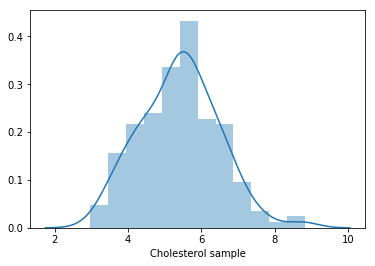

In [485]:
%matplotlib inline
#pyplot.figure(figsize=(15.0, 10.0))
if lable_type == "classify":   
    sns.countplot(y_data)
    pyplot.xlabel(y_title+" sample");
    pyplot.savefig("./temp.png")
else:
    sns.distplot(y_data, hist=True, kde=True)
    pyplot.xlabel(y_title+" sample");
    pyplot.savefig("./temp.png")


In [393]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=4)

In [394]:
y_train=column_or_1d(y_train, warn=True)

In [486]:
# labelencoder=LabelEncoder()
# labelencoder.fit_transform(y_train)

In [91]:
evalu(y_test, y_pred)

explained_variance_score: 0.04833719130325154 越接近1越好
mean_absolute_error: 7.3562821474942295
mean_squared_error: 96.311764999435
median_absolute_error: 6.020542144775391
r2_score: -0.008609261953968161


## 决策树

In [410]:
from sklearn.tree import DecisionTreeRegressor

In [411]:
tree_model = DecisionTreeRegressor()

In [414]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [415]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5598673067283451 越接近1越好
mean_absolute_error: 1.0570588235294118
mean_squared_error: 1.8553235294117647
median_absolute_error: 0.8399999999999999
r2_score: -0.6106079522093957


### 超参数调整

In [416]:
tree_model2 = DecisionTreeRegressor()
tuned_parameters= { 'max_features': ["auto","sqrt","log2"],
                  'min_samples_leaf': range(1,10,1) , 'max_depth': range(1,10,1)
                  }

In [417]:
TM = GridSearchCV(tree_model2, tuned_parameters,cv=10)

In [418]:
TM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': range(1, 10), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [419]:
print(TM.best_params_)

{'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 7}


In [420]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5598673067283451 越接近1越好
mean_absolute_error: 1.0570588235294118
mean_squared_error: 1.8553235294117647
median_absolute_error: 0.8399999999999999
r2_score: -0.6106079522093957


## 随机森林

In [421]:
from sklearn.ensemble import RandomForestRegressor

In [422]:
rr_model=RandomForestRegressor()

In [423]:
rr_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [424]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5598673067283451 越接近1越好
mean_absolute_error: 1.0570588235294118
mean_squared_error: 1.8553235294117647
median_absolute_error: 0.8399999999999999
r2_score: -0.6106079522093957


### 超参数调整

In [459]:
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
RR = GridSearchCV(rr_model, tuned_parameters,cv=10)

In [460]:
RR.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [427]:
y_pred = tree_model.predict(X_test)
tree_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.5598673067283451 越接近1越好
mean_absolute_error: 1.0570588235294118
mean_squared_error: 1.8553235294117647
median_absolute_error: 0.8399999999999999
r2_score: -0.6106079522093957


## XGBoost

In [428]:
#from sklearn import preprocessing
#lbl = preprocessing.LabelEncoder()
#train_x['acc_id1'] = lbl.fit_transform(train_x['acc_id1'].astype(str))#将提示的包含错误数据类型这一列进行转换

In [8]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor(max_depth=5,objective='reg:gamma')  
# XGB_model=XGBClassifier(objective= 'multi:softprob') # 多分类

In [9]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of boosted trees to fit.
 |  silent : boolean
 |      Whether to print messages while running boosting.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
 |  n_jobs : int
 |      Number of parallel threads used to run xgboost.  (replaces ``nthread``)
 |  gamma : float
 |      Minimum lo

In [430]:
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:gamma', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [431]:
y_pred = XGB_model.predict(X_test)
XGB_model.score(X_test, y_pred)
evalu(y_test, y_pred)

explained_variance_score: -0.19059431799435478 越接近1越好
mean_absolute_error: 0.9234981486376594
mean_squared_error: 1.4469258676091545
median_absolute_error: 0.9356154060363768
r2_score: -0.25607759061173163


In [436]:
print(XGB_model.feature_importances_)

[0.00153561 0.00527742 0.01120412 0.02320008 0.00365687 0.00863486
 0.0315629  0.02448498 0.00824199 0.01315442 0.02825086 0.00389032
 0.00782227 0.02494201 0.00560086 0.03832502 0.00326854 0.00961272
 0.02290437 0.02951537 0.00982624 0.02673565 0.00667023 0.01993603
 0.02356114 0.00302439 0.01299371 0.01602833 0.00965167 0.01373242
 0.00233139 0.0248308  0.02015337 0.00485    0.0009356  0.01589436
 0.02464838 0.02012677 0.02653887 0.03397303 0.01272395 0.01324642
 0.00488051 0.00677778 0.00993506 0.02151003 0.02870334 0.06596873
 0.00670753 0.01223959 0.00942217 0.01191725 0.01335743 0.00804259
 0.02240744 0.01190659 0.0068285  0.02663179 0.03610566 0.01109584
 0.00178001 0.00620313 0.01693356 0.01314718]


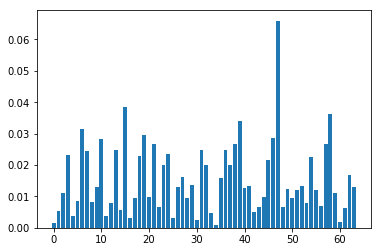

In [437]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

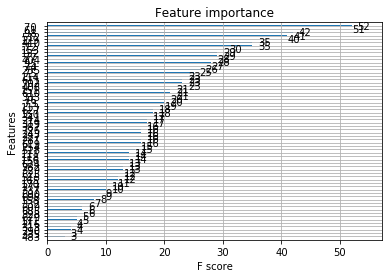

In [438]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(XGB_model)
pyplot.show()

In [29]:
help(plot_importance)

Help on function plot_importance in module xgboost.plotting:

plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)
    Plot importance based on fitted trees.
    
    Parameters
    ----------
    booster : Booster, XGBModel or dict
        Booster or XGBModel instance, or dict taken by Booster.get_fscore()
    ax : matplotlib Axes, default None
        Target axes instance. If None, new figure and axes will be created.
    grid : bool, Turn the axes grids on or off.  Default is True (On).
    importance_type : str, default "weight"
        How the importance is calculated: either "weight", "gain", or "cover"
    
        * "weight" is the number of times a feature appears in a tree
        * "gain" is the average gain of splits which use the feature
        * "cover" is the average coverage of splits which use the featu

###  特征选择

In [457]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
gbdt_RFE = RFE(model, int(0.8*X_train.shape[1]))
gbdt_RFE.fit(X_train, y_train)
gbdt_RFE.ranking_
#特征选择输出结果
#gbdt_RFE.support_
#输出结果为：


array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True])

In [473]:
X_train.shape

(136, 64)

In [458]:
pyplot.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
pyplot.show()

,61,72,73,74,75,76,77,95,98,111,...,610,611,619,624,625,627,685,690,702,726
850,0.08763,0.00227,0.00337,0.00912,0.92729,0.07266,0.30569,0.02557,0.03173,0.26319,...,0.83851,0.16932,0.27568,0.65651,0.42383,2.21426,0.49426,0.75520,13.60813,0.02305
814,0.11185,0.00464,0.00000,0.17030,1.00166,0.00000,0.00000,0.33259,0.00000,0.35661,...,0.00000,0.48900,8.13686,0.00000,1.28955,5.02893,0.06792,0.16304,9.56091,0.00000
720,0.01344,0.00286,0.02261,0.10007,3.92172,0.08675,0.00000,0.01937,0.00000,1.36165,...,2.02262,1.06370,5.25088,0.55415,0.67356,1.45788,0.38973,0.30366,16.02550,0.06081
737,0.00655,0.00300,0.04929,0.39836,0.80423,0.01613,0.28416,0.02062,0.00000,0.28807,...,4.94547,1.50510,14.74455,0.00000,1.39289,6.21633,0.00328,0.12309,8.45865,0.03540
843,0.48082,0.09798,0.29394,0.55871,2.58449,0.11017,0.26504,1.04471,0.17303,0.14684,...,0.16139,0.24277,2.22713,1.98828,1.50117,7.18742,0.10728,0.16467,8.81397,0.02787
864,0.03204,0.04425,0.00000,0.10824,0.86262,0.00000,0.03526,0.05876,0.00000,0.18182,...,0.12252,0.00038,3.94376,0.02213,0.48827,0.00000,0.00654,0.15705,18.24170,0.02871
877,0.62166,0.00000,0.01723,0.00632,0.93107,0.00000,0.09023,0.00137,0.00000,0.08427,...,6.69592,1.02801,10.82138,0.40760,2.40580,1.55032,0.10949,0.17668,3.61774,0.34012
743,0.00000,0.10927,0.00122,0.01962,0.07067,0.02285,0.44075,0.04095,0.01397,0.00000,...,0.28673,0.26287,10.17593,0.60657,0.98747,2.51809,0.00495,0.08544,18.55156,0.00000
785,0.08739,0.00000,0.06191,0.00000,0.36653,0.00192,0.20238,0.19706,0.00000,0.17877,...,0.01116,4.06874,9.49282,1.23557,0.39896,0.60494,0.22398,0.59859,4.55491,0.39903
828,0.16399,0.79895,0.02749,2.04479,0.00000,0.03040,0.00000,0.03699,0.01799,0.70545,...,0.60606,0.46186,6.79872,0.00000,1.62241,1.74928,0.00100,0.02290,8.94006,0.00000
